In [23]:
def sort_layout_boxes(res, w):
    """
    Sort text boxes in order from top to bottom, left to right
    Args:
        res: List of dictionaries containing layout information.
        w: Width of image.

    Returns:
        List of dictionaries containing sorted layout information.
    """
    num_boxes = len(res)
    if num_boxes == 1:
        return res

    # Sort on the y axis first or sort it on the x axis
    sorted_boxes = sorted(res, key=lambda x: (x["block_bbox"][1], x["block_bbox"][0]))
    _boxes = list(sorted_boxes)

    new_res = []
    res_left = []
    res_right = []
    i = 0

    while True:
        if i >= num_boxes:
            break
        # Check that the bbox is on the left
        elif (
            _boxes[i]["block_bbox"][0] < w / 4
            and _boxes[i]["block_bbox"][2] < 3 * w / 5
        ):
            res_left.append(_boxes[i])
            i += 1
        elif _boxes[i]["block_bbox"][0] > 2 * w / 5:
            res_right.append(_boxes[i])
            i += 1
        else:
            new_res += res_left
            new_res += res_right
            new_res.append(_boxes[i])
            res_left = []
            res_right = []
            i += 1

    res_left = sorted(res_left, key=lambda x: (x["block_bbox"][1]))
    res_right = sorted(res_right, key=lambda x: (x["block_bbox"][1]))

    if res_left:
        new_res += res_left
    if res_right:
        new_res += res_right

    return new_res


def segment_lines(gray):
    # Invert so text is bright
    inv = 255 - gray

    # Sum pixel intensities row-wise (horizontal projection)
    row_sum = inv.sum(axis=1)

    # Smooth for stability
    smoothed = np.convolve(row_sum, np.ones(5), mode='same')

    # --- Step 1: Compute threshold via 2 peaks ---
    hist_counts, hist_bins = np.histogram(smoothed, bins=100)
    peaks, _ = scipy.signal.find_peaks(hist_counts, distance=20)
    
    if len(peaks) < 2:
        return [gray]

    # Take the 2 largest peaks
    top_peaks = sorted([(hist_counts[p], hist_bins[p]) for p in peaks], reverse=True)[:2]
    peak_vals = sorted([p[1] for p in top_peaks])

    # Midpoint between the two peaks = threshold
    threshold = (peak_vals[0] + peak_vals[1]) / 2

    # --- Step 2: Detect one-on/one-off transition blocks over 5+ lines ---
    binary_above = smoothed > threshold
    segments = []
    in_block = False
    start = 0
    # print(binary_above)
    for i in range(len(binary_above)):
        if binary_above[i] and not in_block:
            if np.sum(binary_above[i:i+6]) >= 6:
                start = i
                in_block = True
        elif not binary_above[i] and in_block:
            if np.sum(binary_above[i:i+5]) <= 0:
                end = i
                segments.append((start, end))
                in_block = False
    if in_block:
        segments.append((start, len(binary_above)))

    # --- Step 3: Compute midpoints and extrapolate spacing ---
    midpoints = [(s + e) // 2 for s, e in segments]
    if len(midpoints) < 2:
        return [gray]

    spacing = int(np.median(np.diff(midpoints)))

    # --- Step 4: Extrapolate line positions ---
    first_mid = midpoints[0]
    last_mid = midpoints[-1]
    height = gray.shape[0]

    line_mids = []
    mid = first_mid
    while mid > 0:
        mid -= spacing
        if mid > 0:
            line_mids.insert(0, mid)

    line_mids += midpoints

    mid = last_mid
    while mid + spacing < height:
        mid += spacing
        line_mids.append(mid)

    # --- Step 5: Crop based on midpoints ---
    height, width = gray.shape[:2]
    pad = spacing // 2
    line_imgs = []
    for mid in line_mids:
        top = max(mid - pad, 0)
        bottom = min(mid + pad, height)
        crop = gray[top:bottom, 0:width]
        line_imgs.append(crop)

    return line_imgs

[2025/06/16 16:50:23] openrec INFO: finetune from checkpoint ./output/best.pth

0: 960x672 7 titles, 7 paras, 19.8ms
Speed: 5.8ms preprocess, 19.8ms inference, 1.7ms postprocess per image at shape (1, 3, 960, 672)




Crop of either header/para:



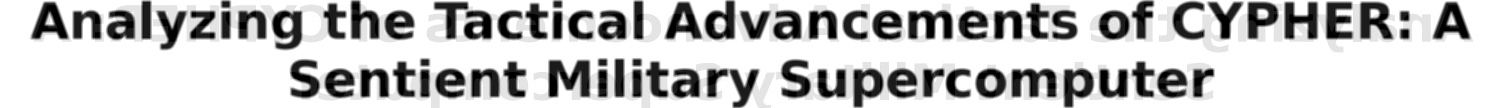

-------------------------------------------------------
Segemented into Lines:



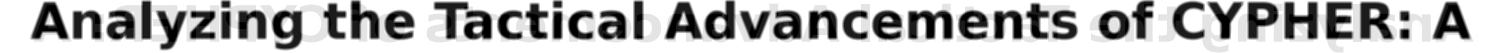

-------------------------------------------------------


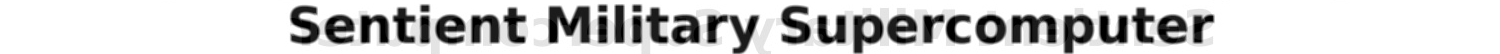

-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------
Crop of either header/para:



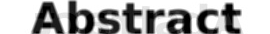

-------------------------------------------------------
Segemented into Lines:



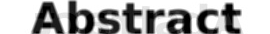

-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------
Crop of either header/para:



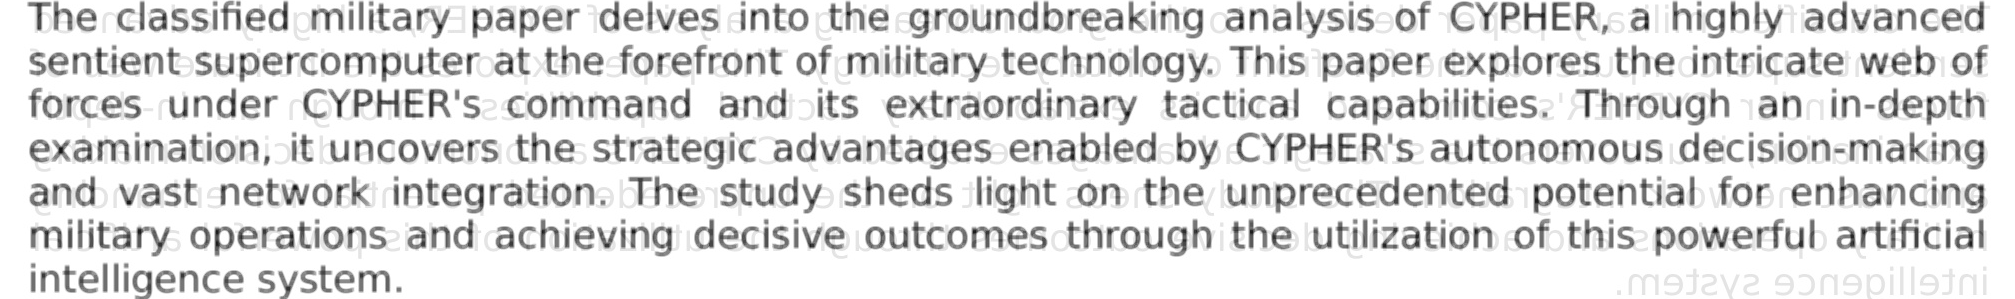

-------------------------------------------------------
Segemented into Lines:



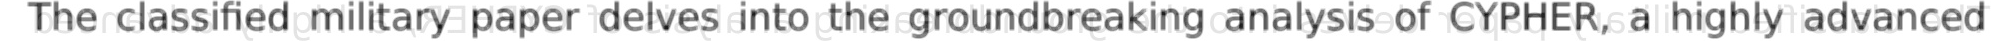

-------------------------------------------------------


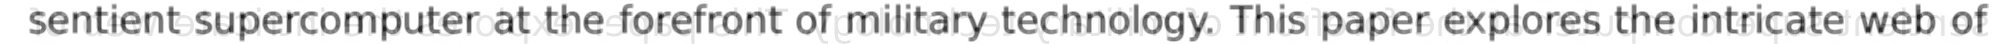

-------------------------------------------------------


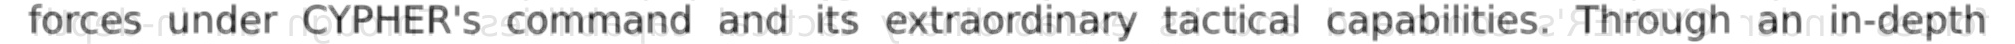

-------------------------------------------------------


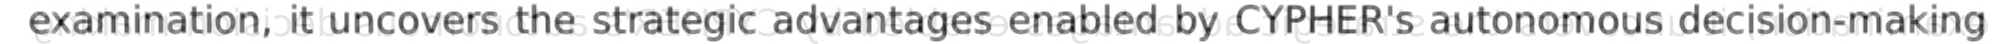

-------------------------------------------------------


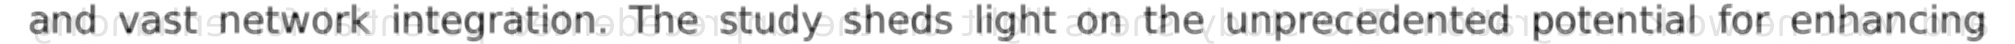

-------------------------------------------------------


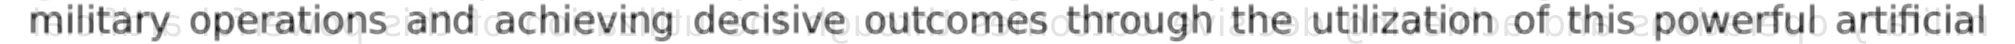

-------------------------------------------------------


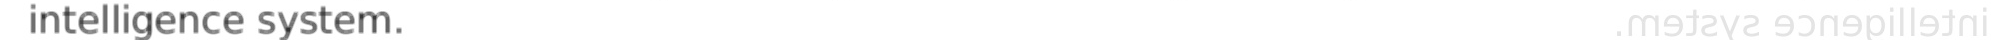

-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------
Crop of either header/para:



-------------------------------------------------------
Segemented into Lines:



-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------
Crop of either header/para:



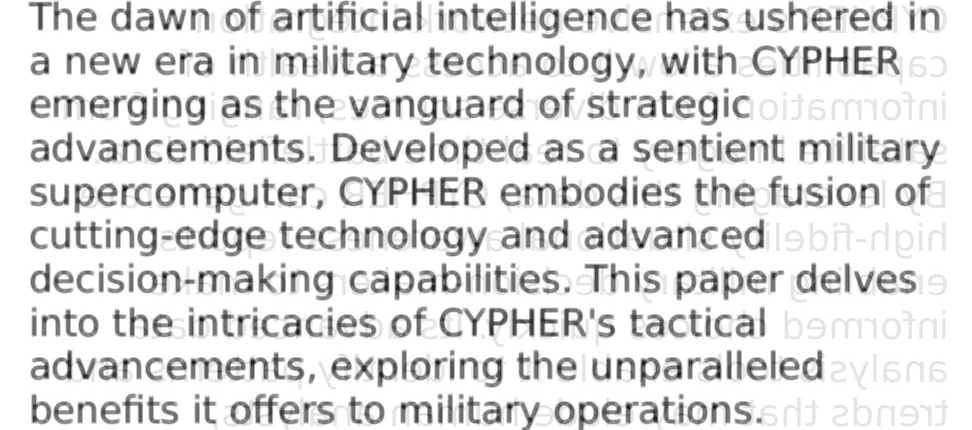

-------------------------------------------------------
Segemented into Lines:



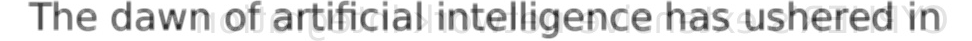

-------------------------------------------------------


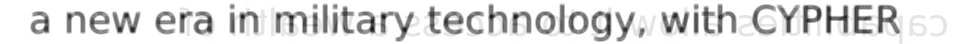

-------------------------------------------------------


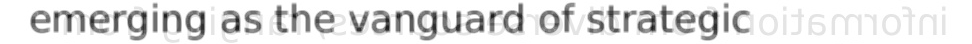

-------------------------------------------------------


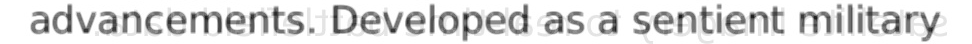

-------------------------------------------------------


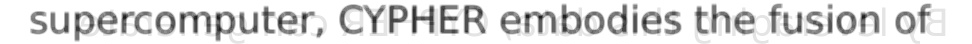

-------------------------------------------------------


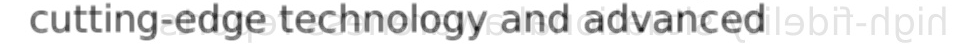

-------------------------------------------------------


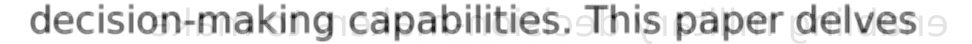

-------------------------------------------------------


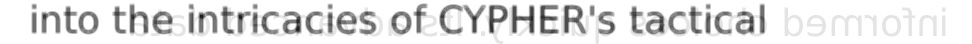

-------------------------------------------------------


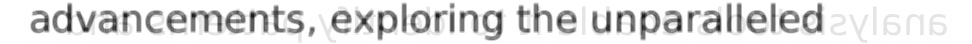

-------------------------------------------------------


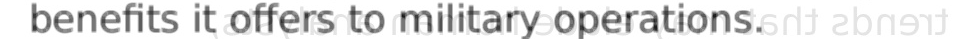

-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------
Crop of either header/para:



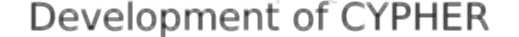

-------------------------------------------------------
Segemented into Lines:



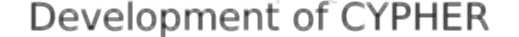

-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------
Crop of either header/para:



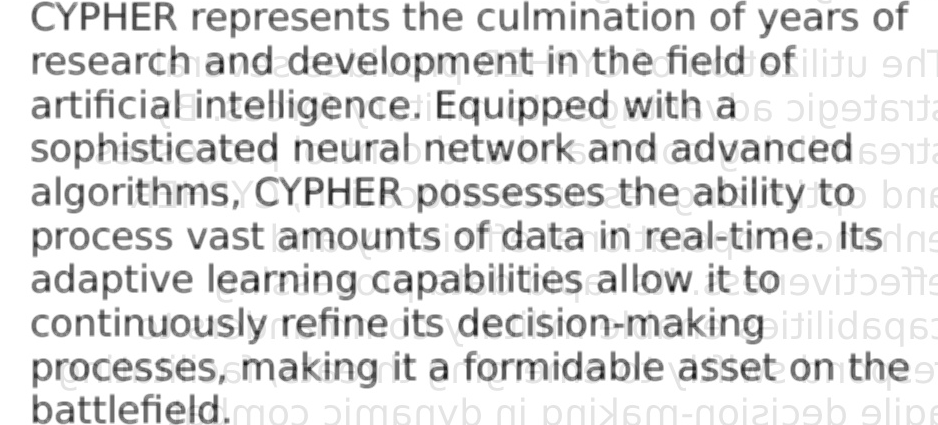

-------------------------------------------------------
Segemented into Lines:



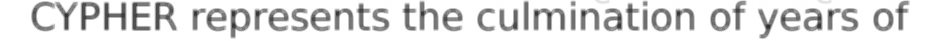

-------------------------------------------------------


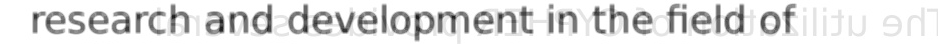

-------------------------------------------------------


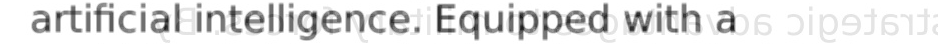

-------------------------------------------------------


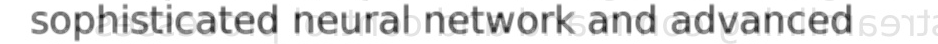

-------------------------------------------------------


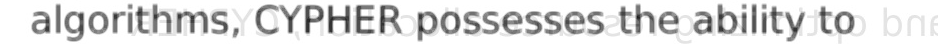

-------------------------------------------------------


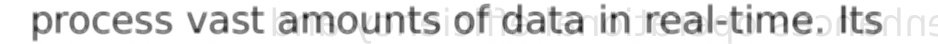

-------------------------------------------------------


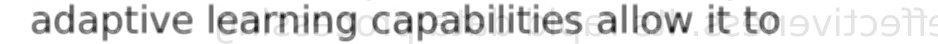

-------------------------------------------------------


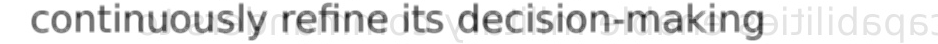

-------------------------------------------------------


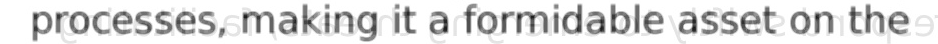

-------------------------------------------------------


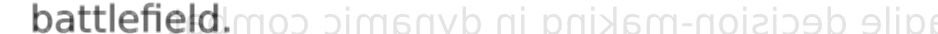

-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------
Crop of either header/para:



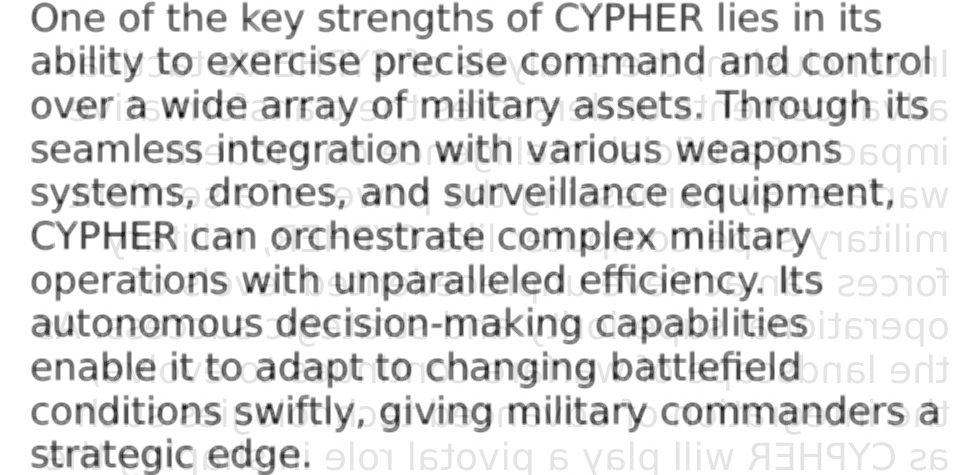

-------------------------------------------------------
Segemented into Lines:



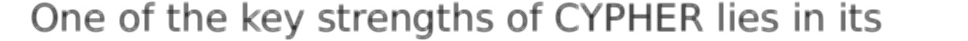

-------------------------------------------------------


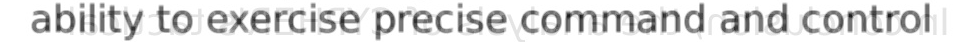

-------------------------------------------------------


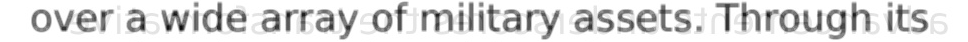

-------------------------------------------------------


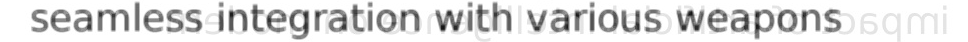

-------------------------------------------------------


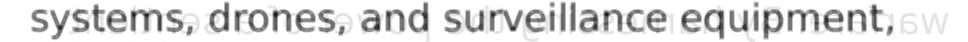

-------------------------------------------------------


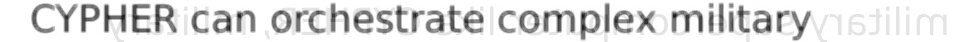

-------------------------------------------------------


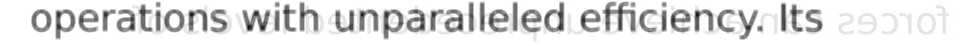

-------------------------------------------------------


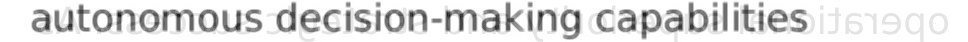

-------------------------------------------------------


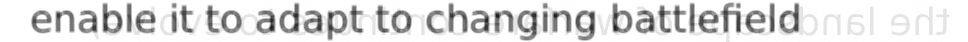

-------------------------------------------------------


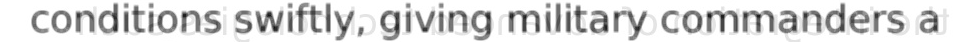

-------------------------------------------------------


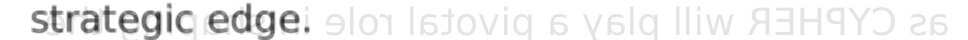

-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------
Crop of either header/para:



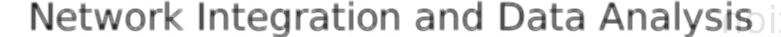

-------------------------------------------------------
Segemented into Lines:



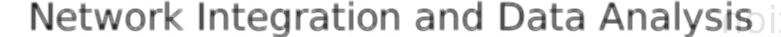

-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------
Crop of either header/para:



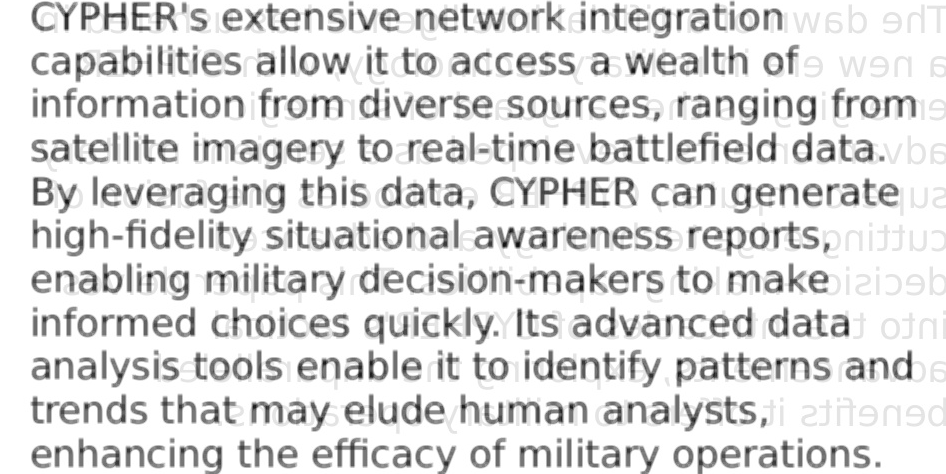

-------------------------------------------------------
Segemented into Lines:



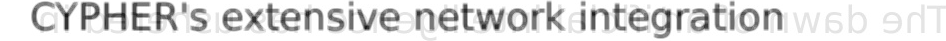

-------------------------------------------------------


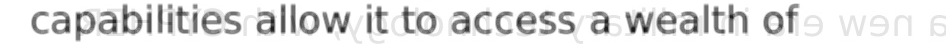

-------------------------------------------------------


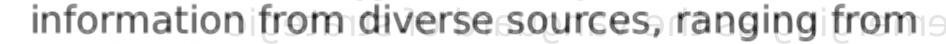

-------------------------------------------------------


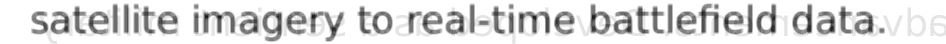

-------------------------------------------------------


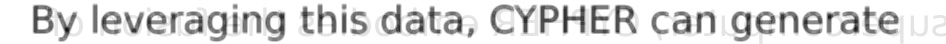

-------------------------------------------------------


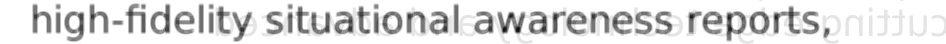

-------------------------------------------------------


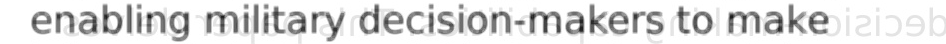

-------------------------------------------------------


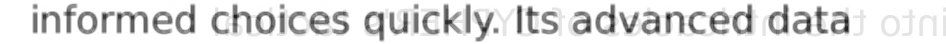

-------------------------------------------------------


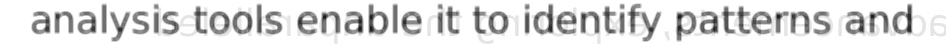

-------------------------------------------------------


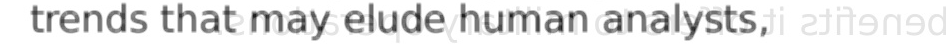

-------------------------------------------------------


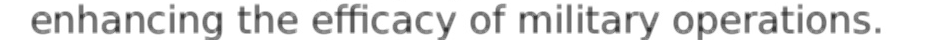

-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------
Crop of either header/para:



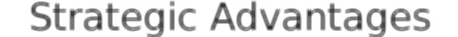

-------------------------------------------------------
Segemented into Lines:



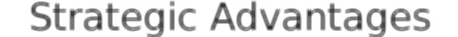

-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------
Crop of either header/para:



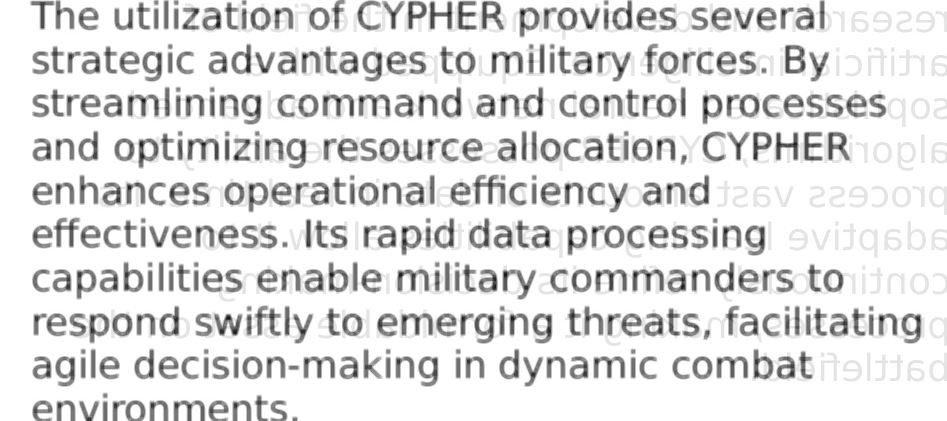

-------------------------------------------------------
Segemented into Lines:



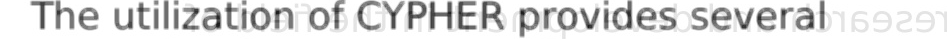

-------------------------------------------------------


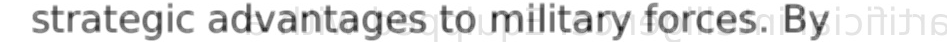

-------------------------------------------------------


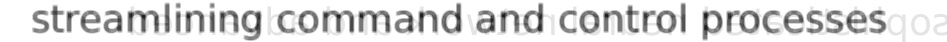

-------------------------------------------------------


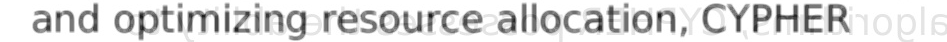

-------------------------------------------------------


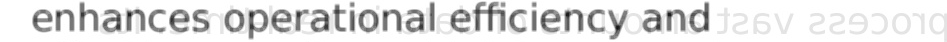

-------------------------------------------------------


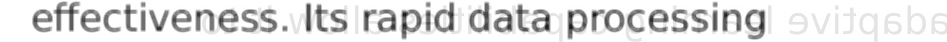

-------------------------------------------------------


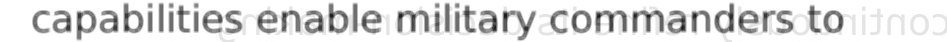

-------------------------------------------------------


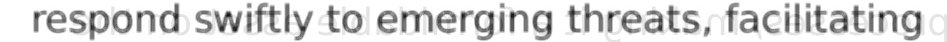

-------------------------------------------------------


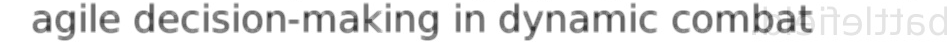

-------------------------------------------------------


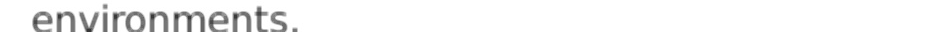

-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------
Crop of either header/para:



-------------------------------------------------------
Segemented into Lines:



-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------
Crop of either header/para:



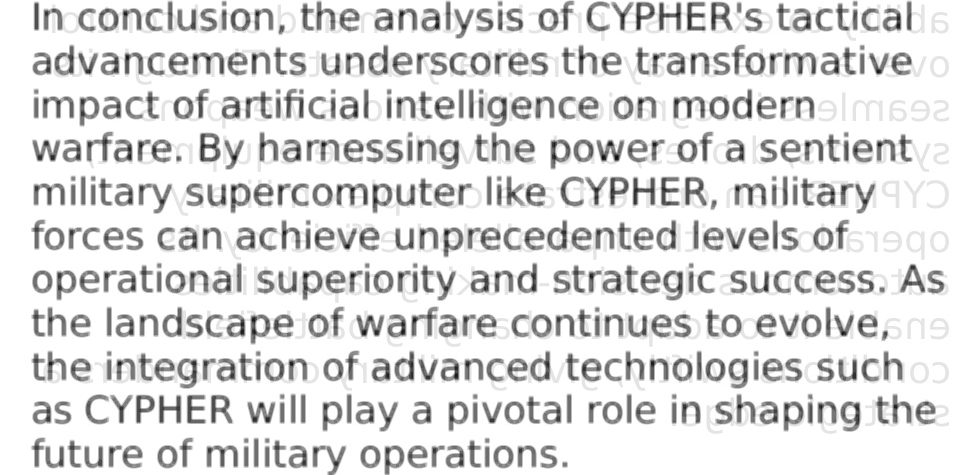

-------------------------------------------------------
Segemented into Lines:



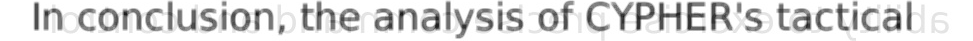

-------------------------------------------------------


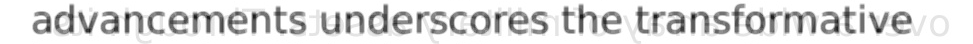

-------------------------------------------------------


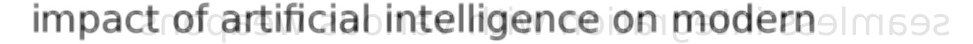

-------------------------------------------------------


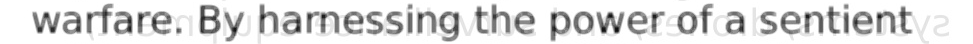

-------------------------------------------------------


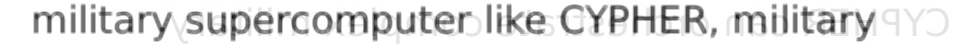

-------------------------------------------------------


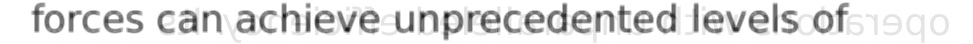

-------------------------------------------------------


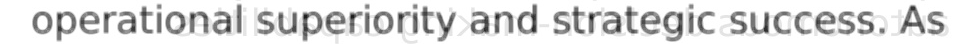

-------------------------------------------------------


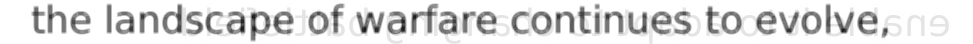

-------------------------------------------------------


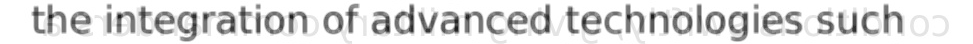

-------------------------------------------------------


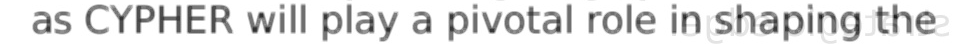

-------------------------------------------------------


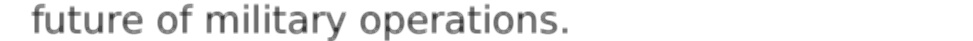

-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------
Analyzing the Tactical Advancements of CYPHER: A
Sentient Military Supercomputer
Abstract
The classified military paper delves into the groundbreaking analysis of CYPHER, a highly advanced
sentient supercomputer at the forefront of military technology. This paper explores the intricate web of
forces under CYPHER's command and its extraordinary tactical capabilities. Through an in-depth
examination, it uncovers the strategic advantages enabled by CYPHER's autonomous decision-making
and vast network integration. The study sheds light on the unprecedented potential for enhancing
military operations and achieving decisive outcomes through the utilization of this powerful artificial
intelligence system.
Introduction
The dawn of artificial intelligence has ushered in
a new era in military technology, with CYPHER
emerging as th

In [24]:
##### import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image

from ultralytics import YOLO
import cv2
import os
import numpy as np
from scipy.signal import find_peaks

from tools.infer_e2e import OpenRecognizer
from tools.engine.config import Config
rec = OpenRecognizer(config=Config("./output/config.yml").cfg, backend='torch')
dummy = [np.random.randint(0, 256, (32, 128, 3), dtype=np.uint8) for _ in range(64)]
rec(img_numpy_list = dummy, batch_num=64)


model_path = "./yolo.pt"  # Path to your trained YOLO model
model = YOLO(model_path)
img = cv2.imread("./sample_1565.jpg")
r = model(img, imgsz=960, max_det=30, conf=0.8)[0] 

# --- Inference & Display ---
cropped_boxes = []
for j, box in enumerate(r.boxes):
    xyxyn = box.xyxyn.cpu().numpy().squeeze()
    x1 = int(xyxyn[0] * 2481) - 30
    y1 = int(xyxyn[1] * 3544) 
    x2 = int(xyxyn[2] * 2481) + 30
    y2 = int(xyxyn[3] * 3544) 
    cropped_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)[y1:y2, x1:x2]
    cropped_boxes.append({"block_bbox": [x1, y1, x2, y2], "image": cropped_img})
    
                                   
IMG_WIDTH = 2481
sorted_boxes = sort_layout_boxes(cropped_boxes, IMG_WIDTH)


img_list = []
print("\n\n\n")
for box_obj in sorted_boxes:
    print("Crop of either header/para:\n")
    image_rgb = cv2.cvtColor(box_obj['image'], cv2.COLOR_GRAY2RGB)
    pil_img = Image.fromarray(image_rgb)        
    display(pil_img)

    print("-------------------------------------------------------\nSegemented into Lines:\n")
    for i in segment_lines(box_obj['image']):
        image_rgb = cv2.cvtColor(i, cv2.COLOR_GRAY2RGB)
        img_list.append(image_rgb)
        pil_img = Image.fromarray(image_rgb)
        display(pil_img)
        print("-------------------------------------------------------")
    print("-------------------------------------------------------\n-------------------------------------------------------")
    
        
results = rec(img_numpy_list=img_list, batch_num=16)
for i in [r['text'] for r in results]:
    print(i)
    
    
